In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [2]:
df = pd.read_csv('example_yosemite_temps.csv')

In [3]:
df['ds'] = pd.to_datetime(df['ds'])

In [4]:
df.head()

,ds,y
0,2017-05-01 00:00:00,27.8
1,2017-05-01 00:05:00,27.0
2,2017-05-01 00:10:00,26.8
3,2017-05-01 00:15:00,26.5
4,2017-05-01 00:20:00,25.6


In [5]:
df['ds']

0       2017-05-01 00:00:00
1       2017-05-01 00:05:00
2       2017-05-01 00:10:00
3       2017-05-01 00:15:00
4       2017-05-01 00:20:00
                ...        
18716   2017-07-04 23:40:00
18717   2017-07-04 23:45:00
18718   2017-07-04 23:50:00
18719   2017-07-04 23:55:00
18720   2017-07-05 00:00:00
Name: ds, Length: 18721, dtype: datetime64[ns]

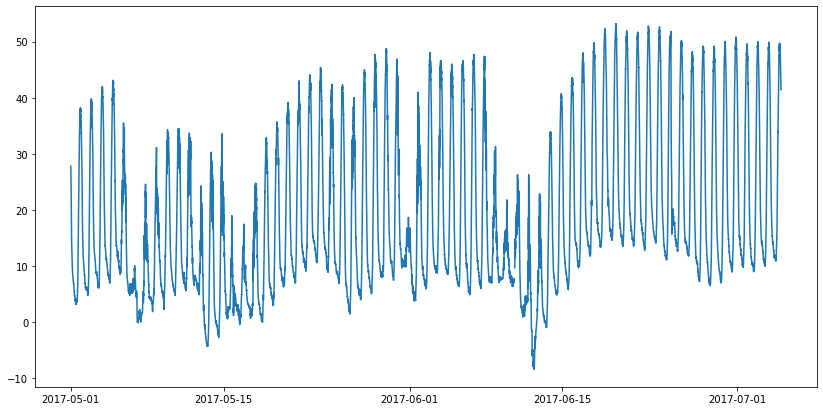

In [6]:
plt.figure(figsize=(14, 7))
plt.plot(df['ds'], df['y'])
plt.show()

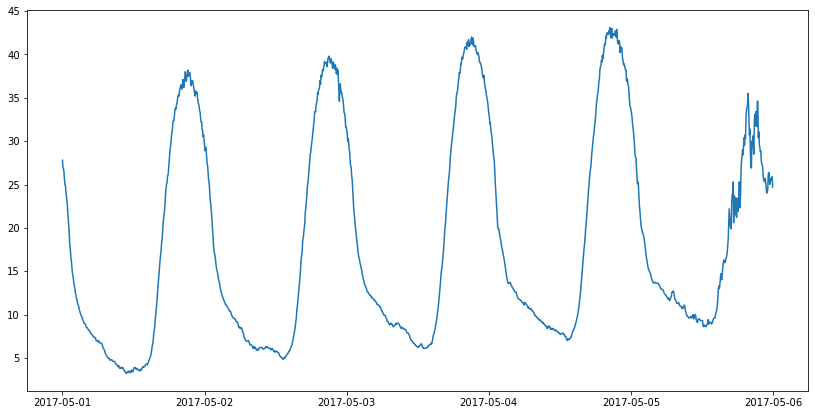

In [54]:
plt.figure(figsize=(14, 7))
plt.plot(df[(df['ds'].dt.month == 5) & (df['ds'].dt.day <= 5)]['ds'], df[(df['ds'].dt.month == 5) & (df['ds'].dt.day <= 5)]['y'])
plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


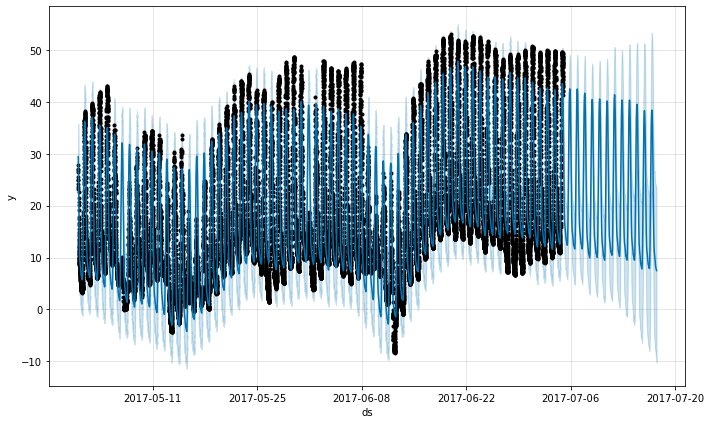

In [7]:
m = Prophet(changepoint_prior_scale=0.01).fit(df)
future = m.make_future_dataframe(periods=300, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)

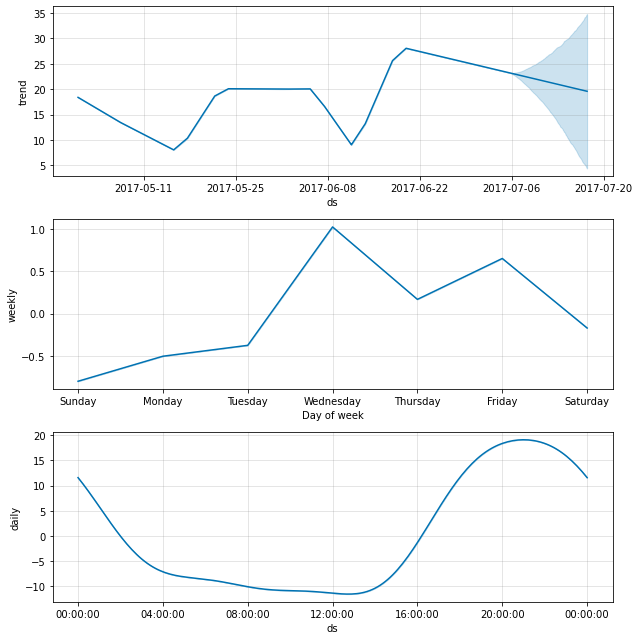

In [8]:
fig = m.plot_components(fcst)

In [116]:
df2 = df.copy()
df2['ds'] = pd.to_datetime(df2['ds'])
df2 = df2[df2['ds'].dt.hour < 6]
df2 = df2[df['ds'] < '2017-07-05']

C:\Users\gregr\miniconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


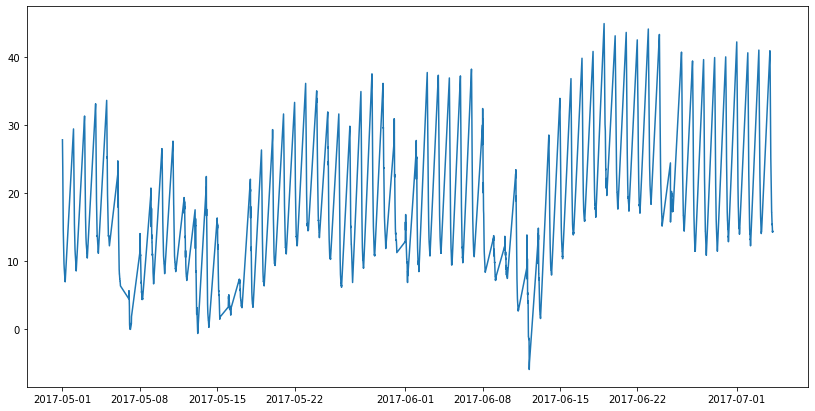

In [117]:
plt.figure(figsize=(14, 7))
plt.plot(df2['ds'], df2['y'])
plt.show()

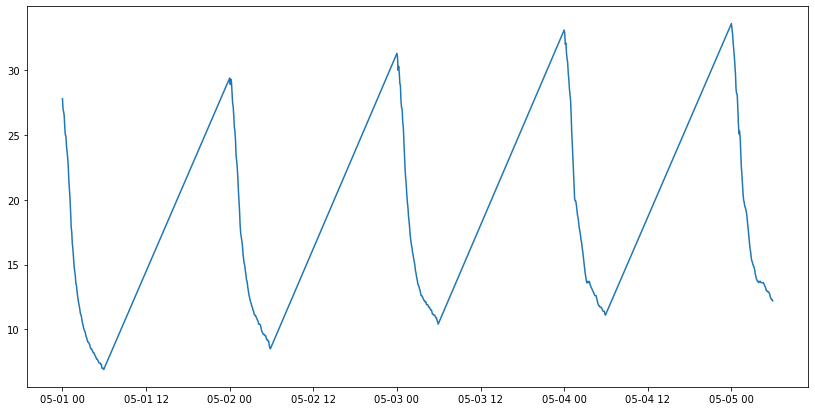

In [118]:
plt.figure(figsize=(14, 7))
plt.plot(df2[(df2['ds'].dt.month == 5) & (df2['ds'].dt.day <= 5)]['ds'], df2[(df2['ds'].dt.month == 5) & (df2['ds'].dt.day <= 5)]['y'])
plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


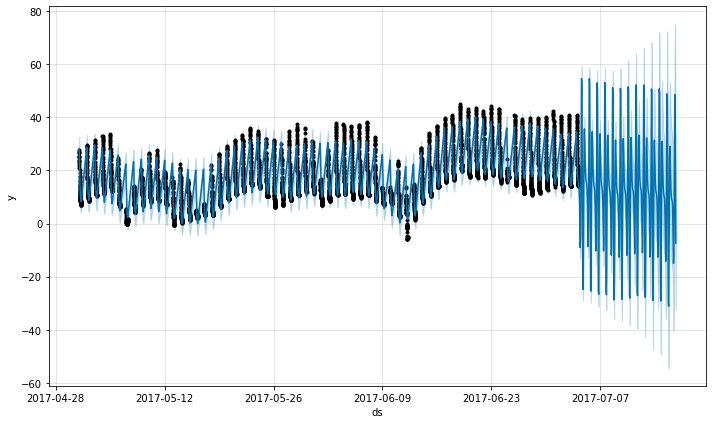

In [119]:
m = Prophet().fit(df2)
future = m.make_future_dataframe(periods=300, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)

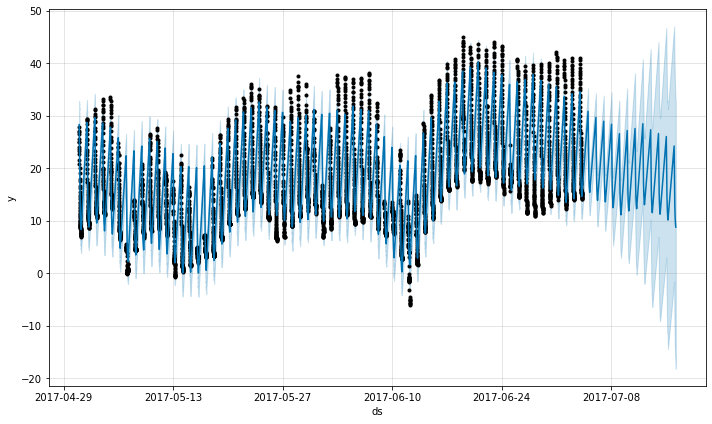

In [121]:
future2 = future.copy()
future2 = future2[future2['ds'].dt.hour < 6]
fcst = m.predict(future2)
fig = m.plot(fcst)

In [131]:
df_cv = cross_validation(m, initial='30 days', period='24 hours', horizon = '5 days')
df_cv.head()

INFO:fbprophet:Making 30 forecasts with cutoffs between 2017-05-31 05:55:00 and 2017-06-29 05:55:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-06-01 00:00:00,29.676706,26.293360,33.045681,12.8,2017-05-31 05:55:00
1,2017-06-01 00:05:00,29.408259,26.444040,32.471076,12.7,2017-05-31 05:55:00
2,2017-06-01 00:10:00,29.100336,26.154556,32.368751,12.8,2017-05-31 05:55:00
3,2017-06-01 00:15:00,28.756020,25.724120,32.111761,12.9,2017-05-31 05:55:00
4,2017-06-01 00:20:00,28.378479,25.261602,31.406182,13.6,2017-05-31 05:55:00


In [132]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,21:00:00,67.847065,8.236933,6.489846,0.339700,0.236591,0.400000
1,21:05:00,66.053748,8.127346,6.416384,0.340017,0.240448,0.400926
2,21:10:00,64.149602,8.009345,6.338009,0.340506,0.244717,0.401852
3,21:15:00,62.105052,7.880676,6.260312,0.343438,0.249161,0.402778
4,21:20:00,60.236463,7.761215,6.189570,0.378708,0.252889,0.401852



mse


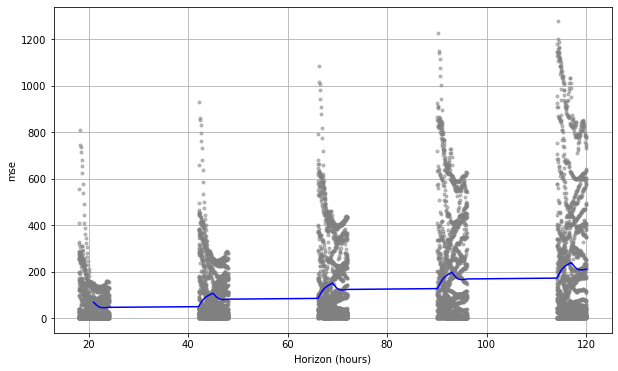

mse   : 13769.80

rmse


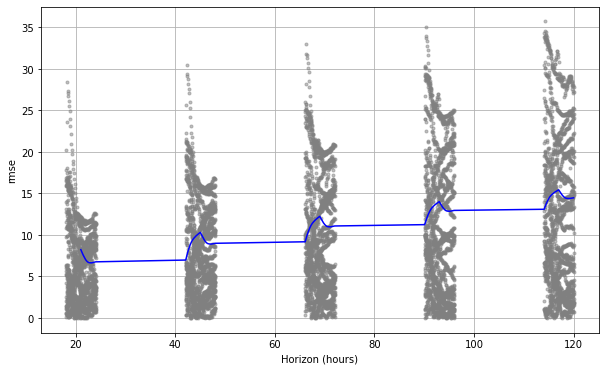

rmse  : 1145.15

mae


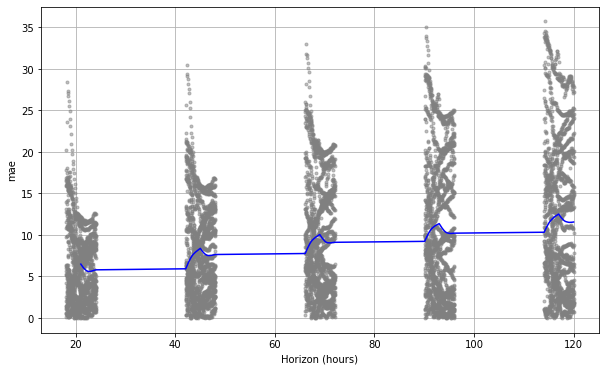

mae   : 931.40

mape


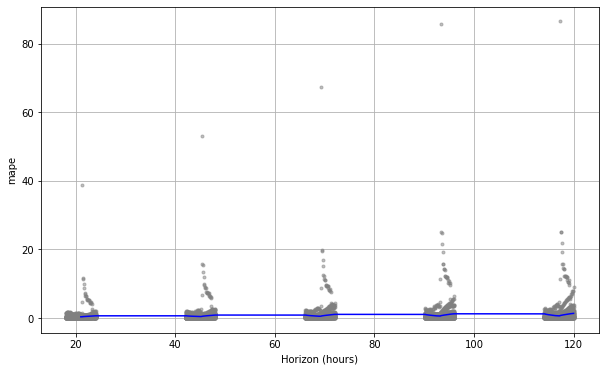

mape  : 74.70

mdape


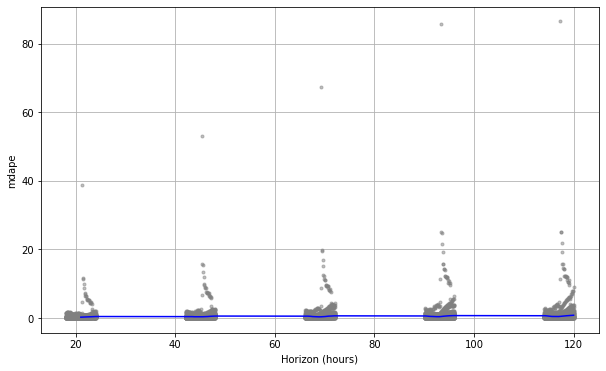

mdape : 46.90


In [133]:
for metric in ['mse', 'rmse', 'mae', 'mape', 'mdape']:
    print()
    print(metric)
    fig = plot_cross_validation_metric(df_cv, metric=metric)
    plt.show()
    print('{:6s}: {:.2f}'.format(metric, 100 * df_p[metric].mean()))

In [40]:
for metric in ['mse', 'rmse', 'mae', 'mape', 'mdape']:
    print('{:6s}: {:.2f}'.format(metric, 100 * df_p[metric].mean()))

mse   : 11334.44
rmse  : 1041.37
mae   : 850.06
mape  : 67.97
mdape : 42.41


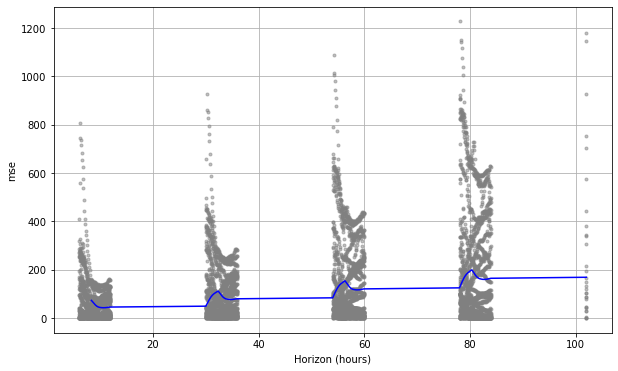

In [41]:
fig = plot_cross_validation_metric(df_cv, metric='mse')

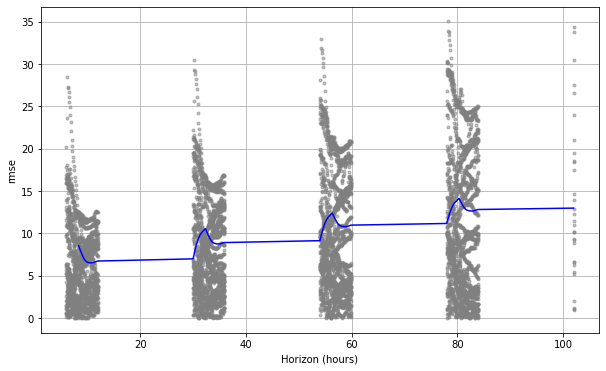

In [42]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

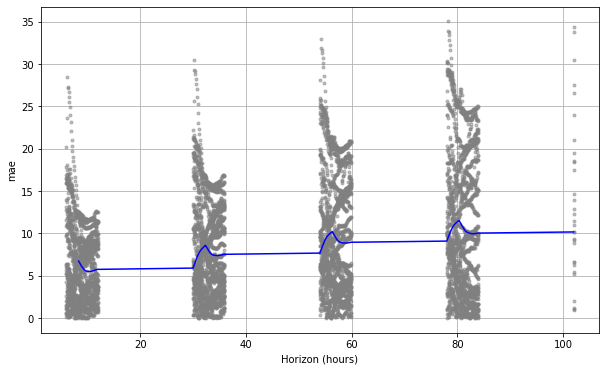

In [43]:
fig = plot_cross_validation_metric(df_cv, metric='mae')

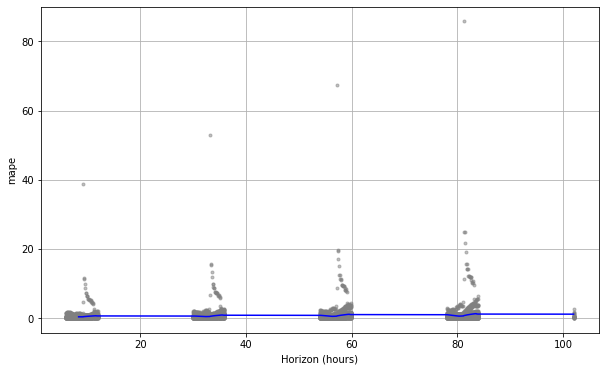

In [44]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

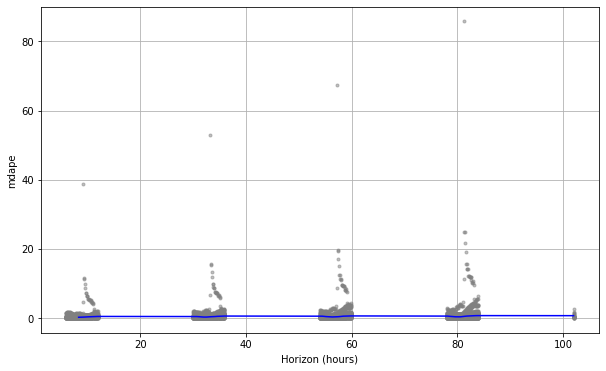

In [45]:
fig = plot_cross_validation_metric(df_cv, metric='mdape')

In [74]:
df2[df2['ds'] >= df2['ds'][0] + timedelta(days=30)].head()

,ds,y
8640,2017-05-31 00:00:00,27.5
8641,2017-05-31 00:05:00,28.7
8642,2017-05-31 00:10:00,30.6
8643,2017-05-31 00:15:00,30.9
8644,2017-05-31 00:20:00,29.4


In [69]:
from datetime import timedelta

In [72]:
df2['ds'][0] + timedelta(days=30)

Timestamp('2017-05-31 00:00:00')